In [969]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (ggong@kasi.re.kr)
# @Date: 2023-10-06
# @Filename: hw3.ipynb

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

In [970]:
class handling_txts:
    """handling the txt file"""

    def __init__(self, file_name: str):
        self.file_name = file_name
        self.file = open(file_name, 'r')
        #print(self.file_name)

    def rd_savetolist(self):

        self.value_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            val = float(line)
            self.value_list.append(val)

        return self.value_list

    def rd_savetolist_abc(self):

        self.first_list = []
        self.second_list = []
        self.third_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            item = line.split(" ")
            first_val = float(item[0])
            self.first_list.append(first_val)
            second_val = float(item[1])
            self.second_list.append(second_val)
            third_val = float(item[2])
            self.third_list.append(third_val)

        return self.first_list, self.second_list, self.third_list

    def rd_ln(self):

        list_len = len(self.value_list)
        return list_len


In [971]:
# Then calculate the following for each dataset:

"""
1. Mean
2. Geometric mean (can you?!)
3. Median
4. Mode
5. Variance
6. Standard deviation
7. Skewness
8. Kurtosis
"""

class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

    def skewness(self):
        # sum((val - self.mean)**3)/self.num
        # StandardDeviation**(3)
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**3
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**3
        self.skewness = top_comp / under_comp

        return self.skewness

    def kurtosis(self):
        # sum((val - self.mean)**4)/self.num
        # StandardDeviation**4
        
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**4
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**4
        self.kurtosis = top_comp / under_comp

        return self.kurtosis



In [972]:
def model1(a, b, x_list):
    model1 = []
    for x in x_list:
        if x == 0:
            model1_val = 1
        else:
            model1_val = (a*x)+(x**b)+1
        model1.append(model1_val)

    #print(f"model = {a}*x + x**{b} + 1")

    return model1

def model2(a, b, c, x_list):
    model2 = []
    for x in x_list:
        model2_val = a*np.tanh(x-b)+c
        model2.append(model2_val)

    return model2

def model3(a, b, x_list):
    model3 = []
    for x in x_list:
        model3_val = a*x*(np.sin(b))+1
        model3.append(model3_val)

    return model3

def model4(a, b, x_list):
    model4 = []
    for x in x_list:
        model4_val = a + b*(1+x)
        model4.append(model4_val)

    return model4

def model5(a, b, x_list):
    model5 = []
    for x in x_list:
        model5_val = np.sqrt(a*(1+x)**3+b)
        model5.append(model5_val)

    return model5


In [973]:
a_list = list(range(-10, 11))
b_list = list(range(-10, 11))
c_list = list(range(-10, 11))

In [974]:
mk_h = handling_txts("regression_data_h.txt")
data_h_x, data_h_y, data_h_sigma_y = mk_h.rd_savetolist_abc()

mk_h_cal = Cal_sample_statistic(data_h_x)
x_sigma = mk_h_cal.StandardDeviation()


In [975]:
models = {}
ab_list = []
for a in a_list:
    for b in b_list:
        model = model1(a, b, data_h_x)
        #ab_list = [a, b]
        models[a, b] = model


print(models[0, 0])

[1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


In [976]:

def chi_squared(y, model, sigma):
    sum = 0
    for i in range(len(y)):
        Chi_squared = (y[i]-model[i])**2/sigma**2
        sum = sum + Chi_squared

    return sum

chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b] = chis

print(chis_dict)

{(-10, -10): 4.035146229481477e+25, (-10, -9): 1.0292719578166014e+23, (-10, -8): 2.6254559695613392e+20, (-10, -7): 6.697216221350743e+17, (-10, -6): 1708614927388973.2, (-10, -5): 4361526995544.707, (-10, -4): 11159452414.061806, (-10, -3): 28886226.007598534, (-10, -2): 127669.20651170707, (-10, -1): 49662.4956688308, (-10, 0): 47793.61545584538, (-10, 1): 41873.34129093886, (-10, 2): 22662.6980376657, (-10, 3): 22314.678164218847, (-10, 4): 1595827.8240506204, (-10, 5): 41283479.59646973, (-10, 6): 922596215.0057638, (-10, 7): 20374477478.862385, (-10, 8): 454725944233.45996, (-10, 9): 10275413517167.254, (-10, 10): 234714846735371.22, (-9, -10): 4.03514622948152e+25, (-9, -9): 1.0292719578168245e+23, (-9, -8): 2.6254559695726592e+20, (-9, -7): 6.697216221927479e+17, (-9, -6): 1708614930349793.5, (-9, -5): 4361527143559.184, (-9, -4): 11159452676.562855, (-9, -3): 28878311.770489108, (-9, -2): 119248.31416460128, (-9, -1): 41238.29849406493, (-9, 0): 39511.50778603, (-9, 1): 34144.

In [977]:


# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)




최소값: 36.96574134162346
최소값의 키: [(1, 0)]


In [978]:
chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

[4.035146229481477e+25, 1.0292719578166014e+23, 2.6254559695613392e+20, 6.697216221350743e+17, 1708614927388936.2, 4361526995507.741, 11159452377.096064, 28886189.041857194, 127632.24077036545, 49625.52992748918, 47756.64971450376, 41836.37554959724, 22625.732296324077, 22277.712422877223, 1595790.8583092787, 41283442.63072839, 922596178.0400224, 20374477441.896645, 454725944196.4942, 10275413517130.29, 234714846735334.25, 4.03514622948152e+25, 1.0292719578168245e+23, 2.6254559695726592e+20, 6.697216221927479e+17, 1708614930349756.5, 4361527143522.2183, 11159452639.597113, 28878274.804747768, 119211.34842325965, 41201.33275272331, 39474.54204468838, 34107.13916691057, 17078.6741314592, 25701.149287313263, 1637275.978109685, 41490293.02406918, 923534597.5439184, 20378698503.572594, 454745063462.4667, 10275500884841.09, 234715249186529.0, 4.0351462294815646e+25, 1.0292719578170477e+23, 2.6254559695839792e+20, 6.697216222504228e+17, 1708614933311363.0, 4361527292324.81, 11159453690.216965

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


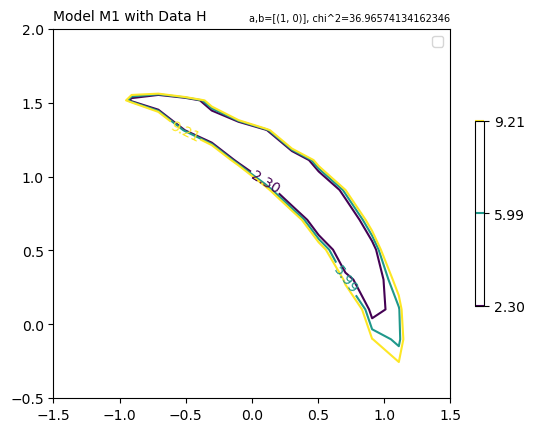

In [979]:
n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model1(X, Y, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS =  ax.contour(X, Y, chis_contour, levels=prob_df_2)
ax.set_ylim([-0.5,2])
ax.set_xlim([-1.5,1.5])
ax.set_title(f'Model M1 with Data H', loc="left", fontsize=10)
ax.set_title(f'a,b={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()

In [980]:
print(chis_contour)

[[4.03514623e+25 4.03514623e+25 4.03514623e+25 ... 4.03514623e+25
  4.03514623e+25 4.03514623e+25]
 [1.20768670e+25 1.20768670e+25 1.20768670e+25 ... 1.20768670e+25
  1.20768670e+25 1.20768670e+25]
 [3.61450920e+24 3.61450920e+24 3.61450920e+24 ... 3.61450920e+24
  3.61450920e+24 3.61450920e+24]
 ...
 [6.62279966e+13 6.62280405e+13 6.62280843e+13 ... 6.62322475e+13
  6.62322914e+13 6.62323352e+13]
 [1.24654633e+14 1.24654693e+14 1.24654752e+14 ... 1.24660422e+14
  1.24660482e+14 1.24660542e+14]
 [2.34714847e+14 2.34714928e+14 2.34715009e+14 ... 2.34722733e+14
  2.34722815e+14 2.34722896e+14]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


최소값: 77.62192658166042
최소값의 키: [(7, 5, 10)]
[942.9591620745222, 942.9591586334941, 942.9591332075614, 942.958945334586, 942.9575571671842, 942.9473019160636, 942.8716342025531, 942.3184481902694, 938.5468461313159, 925.2511089053668, 1135.1025155832554, 2655.503522080785, 5072.368861566914, 7303.76241000876, 9116.73914062804, 10737.837769107984, 11763.875810155707, 12015.699801417217, 12053.89214699175, 12059.146474348465, 12059.859166172582, 604.8691477786662, 604.8691470032561, 604.8691412737169, 604.8690989383227, 604.8687861466861, 604.8664763838638, 604.8494897549645, 604.7283459160246, 604.065949242043, 609.8199775616798, 863.7503765841944, 2294.6793709240715, 4485.7593800506, 6494.013573648261, 8109.791427616605, 9506.212104756454, 10364.582208686988, 10573.503608999354, 10605.144674837356, 10609.496845886286, 10610.087154214729, 360.8781433030545, 360.8781446773697, 360.87815483226825, 360.87822986772596, 360.87878432762676, 360.88288228350564, 360.91321800293747, 361.140399987

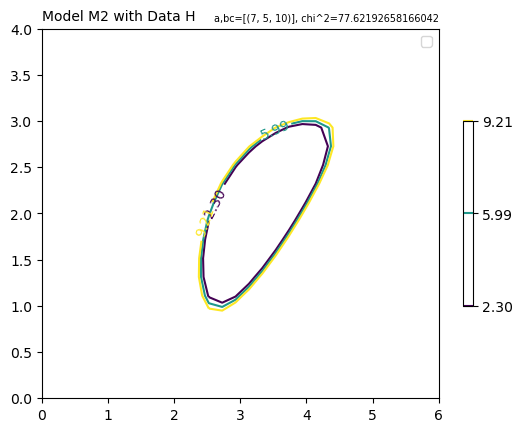

In [981]:
# model 3
models = {}
abc_list = []
for a in a_list:
    for b in b_list:
        for c in c_list:
            model = model2(a, b, c, data_h_x)
            #ab_list = [a, b]
            models[a, b, c] = model


chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b, c]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b,c] = chis

# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)

chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
samp3 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model2(X, Y, samp3, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS =  ax.contour(X,Y,chis_contour,levels=prob_df_2)
ax.set_ylim([0,4])
ax.set_xlim([0,6])
ax.set_title(f'Model M2 with Data H', loc="left", fontsize=10)
ax.set_title(f'a,bc={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()

최소값:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 9.154728169288067
최소값의 키: [(-2, -7), (2, 7)]
[17940.527451084297, 3120.352383249263, 29052.412283259826, 10913.72737329622, 6628.489615814595, 46787.59987481507, 31039.86920849268, 4.244311374377764, 23887.204601517224, 19906.578481749544, 673.3363463124039, 37244.69232431711, 42622.85037860439, 2911.9556993845226, 15446.309766887398, 27029.41624082244, 871.2647029951772, 24450.627215693174, 49437.6735943855, 11611.859925103876, 6731.228350280109, 15164.17960071383, 2273.301496847803, 22743.051096239156, 8358.892585261432, 5756.085615686051, 38915.00806792922, 25971.938139550668, 0.5247855521462768, 18633.465573059388, 15472.047353100948, 673.3363463124039, 31076.349811411765, 35495.54677243782, 2617.465034761276, 11937.734642105908, 21132.64279733586, 574.5831941485765, 20542.102443418695, 41089.78627625228, 9915.658284516954, 5075.810409990055, 12621.082581430754, 1560.1060066036248, 17205.1240410687, 6144.234616190287, 4945.21243181936, 31767.119695273508, 21355.4021334362, 12.5005

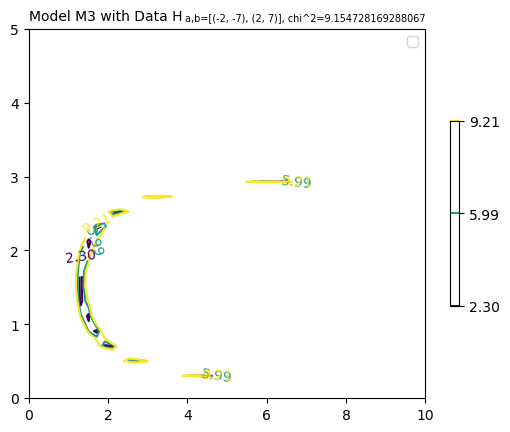

In [982]:
# model 3
models = {}
ab_list = []
for a in a_list:
    for b in b_list:
        model = model3(a, b, data_h_x)
        #ab_list = [a, b]
        models[a, b] = model


chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b] = chis

# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)

chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model3(X, Y, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS =  ax.contour(X,Y,chis_contour,levels=prob_df_2)
ax.set_ylim([0,5])
ax.set_xlim([0,10])
ax.set_title(f'Model M3 with Data H', loc="left", fontsize=10)
ax.set_title(f'a,b={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


최소값: 27.56467516818103
최소값의 키: [(-3, 2)]
[126625.79439654075, 108830.94324666579, 92388.80496807795, 77299.37956077719, 63562.66702476362, 51178.66736003716, 40147.380566597814, 30468.806644445605, 22142.945593580527, 15169.797414002578, 9549.36210571176, 5281.639668708066, 2366.6301029915044, 804.3334085620689, 594.7495854197639, 1737.878633564588, 4233.72055299654, 8082.275343715623, 13283.543005721836, 19837.52353901516, 27744.21694359565, 122053.24893628318, 104587.74432106162, 88474.95257712726, 73714.87370447998, 60307.50770311983, 48252.854573046854, 37550.914314260976, 28201.686926762235, 20205.172410550626, 13561.370765626141, 8270.281991988786, 4331.906089638557, 1746.2430585754614, 513.2928987994921, 633.0556103106522, 2105.5311931089423, 4930.71964719436, 9108.620972566905, 14639.235169226587, 21522.562237173388, 29758.602176407316, 117574.8024859265, 100438.64440535846, 84655.19919607752, 70224.46685808375, 57146.44739137708, 45421.14079595756, 35048.54707182514, 26028.666

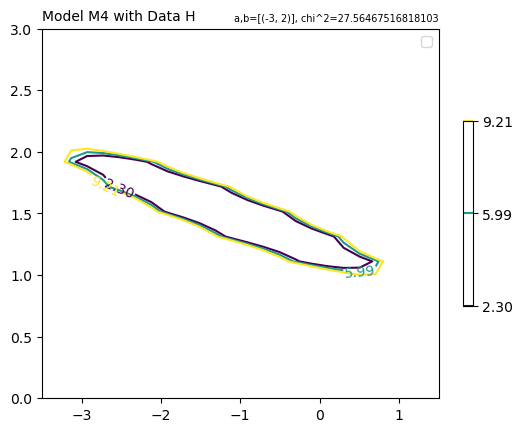

In [983]:
# model 3
models = {}
ab_list = []
for a in a_list:
    for b in b_list:
        model = model4(a, b, data_h_x)
        #ab_list = [a, b]
        models[a, b] = model


chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b] = chis

# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)

chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model4(X, Y, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS =  ax.contour(X,Y,chis_contour,levels=prob_df_2)
ax.set_ylim([0,3])
ax.set_xlim([-3.5,1.5])
ax.set_title(f'Model M4 with Data H', loc="left", fontsize=10)
ax.set_title(f'a,b={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()

최소값: nan
최소값의 키: []
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

C:\Users\mming\AppData\Local\Temp\ipykernel_18000\2571719477.py:41: RuntimeWarning: invalid value encountered in sqrt
  model5_val = np.sqrt(a*(1+x)**3+b)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


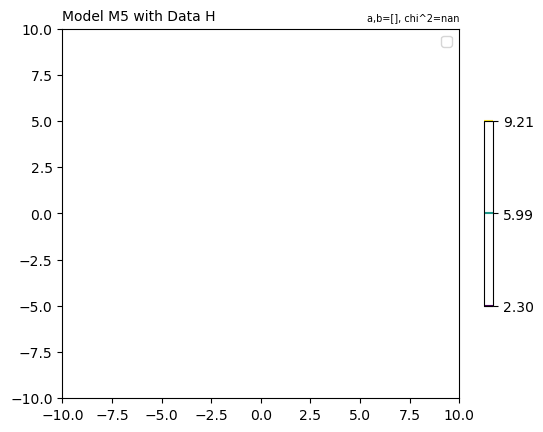

In [984]:
# model 3
models = {}
ab_list = []
for a in a_list:
    for b in b_list:
        model = model5(a, b, data_h_x)
        [x for x in model if math.isnan(x) == False]
        #ab_list = [a, b]
        models[a, b] = model


chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b] = chis

# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)

chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model5(X, Y, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS =  ax.contour(X,Y,chis_contour,levels=prob_df_2)
ax.set_ylim([-10,10])
ax.set_xlim([-10,10])
ax.set_title(f'Model M5 with Data H', loc="left", fontsize=10)
ax.set_title(f'a,b={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()

In [985]:
mk_h = handling_txts("regression_data_k.txt")
data_h_x, data_h_y, data_h_sigma_y = mk_h.rd_savetolist_abc()

mk_h_cal = Cal_sample_statistic(data_h_x)
x_sigma = mk_h_cal.StandardDeviation()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


최소값: 77.35144274099646
최소값의 키: [(1, 0)]
[4.035146229481556e+25, 1.0292719578170014e+23, 2.6254559695813178e+20, 6.697216222337421e+17, 1708614932146664.5, 4361527211305.9565, 11159458964.629644, 28884284.90144532, 125529.6856548288, 47546.13435128416, 45713.03258988812, 39979.35409381572, 21729.954728628018, 26024.964260800713, 1621359.2147337946, 41410547.37934435, 923194647.4904257, 20377266561.969486, 454738941118.0708, 10275474234338.818, 234715131304748.53, 4.035146229481601e+25, 1.0292719578172248e+23, 2.6254559695926388e+20, 6.697216222914171e+17, 1708614935107671.5, 4361527359506.214, 11159459412.914057, 28876556.44771086, 117294.57668268816, 39307.72055148334, 37616.708295037824, 32435.9010860941, 16368.679938728197, 29634.18450020181, 1663030.117909166, 41617583.5560601, 924133252.7776967, 20381487809.428806, 454758060569.82666, 10275561602235.4, 234715533756129.1, 4.0351462294816444e+25, 1.0292719578174478e+23, 2.6254559696039582e+20, 6.697216223490917e+17, 1708614938069463.

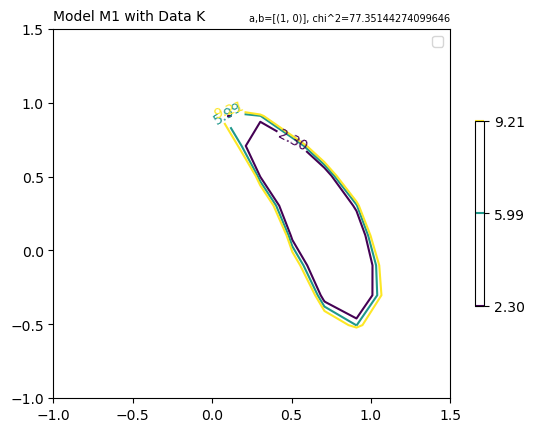

In [994]:
# model 3
models = {}
ab_list = []
for a in a_list:
    for b in b_list:
        model = model1(a, b, data_h_x)
        [x for x in model if math.isnan(x) == False]
        #ab_list = [a, b]
        models[a, b] = model


chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b] = chis

# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)

chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model1(X, Y, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS = ax.contour(X, Y, chis_contour, levels=prob_df_2)
ax.set_ylim([-1,1.5])
ax.set_xlim([-1,1.5])
ax.set_title(f'Model M1 with Data K', loc="left", fontsize=10)
ax.set_title(f'a,b={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


최소값: 84.89821471635229
최소값의 키: [(6, 7, 10)]
[791.9798456724483, 791.9798409135065, 791.9798057494288, 791.9795459207741, 791.9776260697129, 791.9634422268546, 791.8587485843206, 791.0912331816631, 785.7437788294548, 761.2067033735221, 903.4225743421423, 2175.7854477142105, 4130.341455282503, 6008.105063968305, 8003.21125275555, 10185.052444278248, 11519.916842351253, 11836.167158225671, 11883.775526480758, 11890.318174433607, 11891.205481312732, 453.0074797616785, 453.0074778001451, 453.0074633062758, 453.00735621077047, 453.0065649038403, 453.00071940845396, 452.9576094434335, 452.64356915315784, 450.56290541524595, 446.1997293278981, 639.2581462120713, 1846.9528207390306, 3621.9544311395052, 5311.941678956725, 7091.636045276236, 8992.72502915457, 10129.038854407852, 10395.94394687184, 10436.059433122344, 10441.571092707796, 10442.318554585745, 208.13412367115228, 208.1341239911357, 208.1341263555188, 208.1341438264334, 208.13427293940612, 208.1352280218951, 208.14234299810812, 208.19

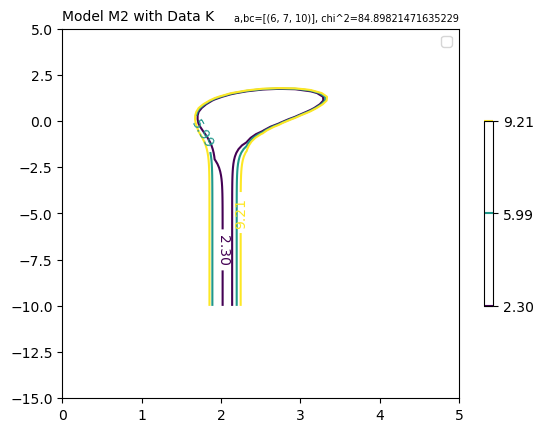

In [987]:
# model 3
models = {}
abc_list = []
for a in a_list:
    for b in b_list:
        for c in c_list:
            model = model2(a, b, c, data_h_x)
            #ab_list = [a, b]
            models[a, b, c] = model


chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b, c]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b,c] = chis

# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)

chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
samp3 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model2(X, Y, samp3, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS =  ax.contour(X,Y,chis_contour,levels=prob_df_2)
ax.set_ylim([-15,5])
ax.set_xlim([0,5])
ax.set_title(f'Model M2 with Data K', loc="left", fontsize=10)
ax.set_title(f'a,bc={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


최소값: 85.61760294595038
최소값의 키: [(-2, 10), (2, -10)]
[16708.77841627833, 3664.951759512957, 30669.427169858536, 11913.250994990802, 5888.333818611897, 44785.02973951341, 29412.80773641654, 45.37357062564911, 25355.479795071085, 21248.843422204034, 452.28809183909493, 35460.330874916006, 40712.4786761039, 2428.7299311866327, 16631.274730016914, 28589.889867177495, 1169.3239912512581, 23009.00708505196, 47378.56219884017, 10625.164039893565, 7520.880876139461, 14033.500643941125, 2741.336110037795, 24176.259668730665, 9236.359019339225, 5067.840572756295, 37090.59012071039, 24485.47798923482, 15.436293430959552, 19932.808421810536, 16657.980974062662, 452.28809183909493, 29448.31968150344, 33754.107414740065, 2160.4570179358443, 12982.09828347515, 22514.96423560809, 820.7317281317187, 19222.539500394276, 39214.48119481414, 9005.52716238034, 5764.392857816144, 11591.473702691312, 1951.5758567199182, 18454.526299453006, 6899.643862651295, 4308.878143162541, 30120.853936137526, 20009.5433048

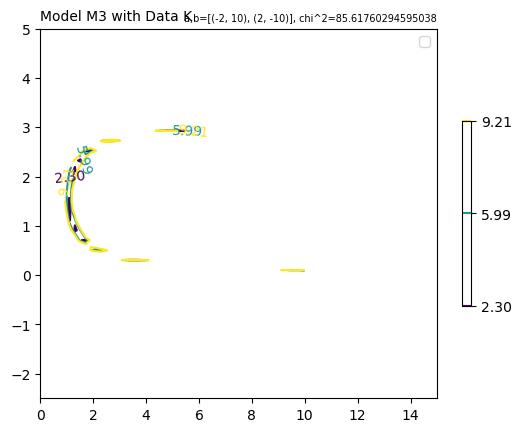

In [990]:
# model 3
models = {}
ab_list = []
for a in a_list:
    for b in b_list:
        model = model3(a, b, data_h_x)
        [x for x in model if math.isnan(x) == False]
        #ab_list = [a, b]
        models[a, b] = model


chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b] = chis

# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)

chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model3(X, Y, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS =  ax.contour(X,Y,chis_contour,levels=prob_df_2)
ax.set_ylim([-2.5,5])
ax.set_xlim([0, 15])
ax.set_title(f'Model M3 with Data K', loc="left", fontsize=10)
ax.set_title(f'a,b={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


최소값: 77.89616229898685
최소값의 키: [(1, 1)]
[124591.57316440914, 106981.62303786371, 90724.38578260533, 75819.8613986341, 62268.049885950044, 50068.95124455312, 39222.56547444327, 29728.892575620583, 21587.932548085013, 14799.68539183658, 9364.15110687527, 5281.32969320109, 2551.221150814041, 1173.8254797141215, 1149.1426799013302, 2477.1727513756687, 5157.915694137136, 9191.371508185734, 14577.540193521458, 21316.42175014431, 29408.01617805429, 120018.145352516, 102737.54176062394, 86809.6510400191, 72234.47319070133, 59012.00821267071, 47142.25610592726, 36625.21687047089, 27460.89050630166, 19649.277013419556, 13190.376391824591, 8084.188641516753, 4330.7137624960405, 1929.9517547624557, 881.9026183160021, 1186.5663531566768, 2843.94295928448, 5854.032436699412, 10216.834785401477, 15932.350005390663, 23000.578096666988, 31421.519059230428, 115538.81655052378, 98587.55949328523, 82989.01530733384, 68743.18399266954, 55850.065549292434, 44309.6599772024, 34121.967276399504, 25286.9874468

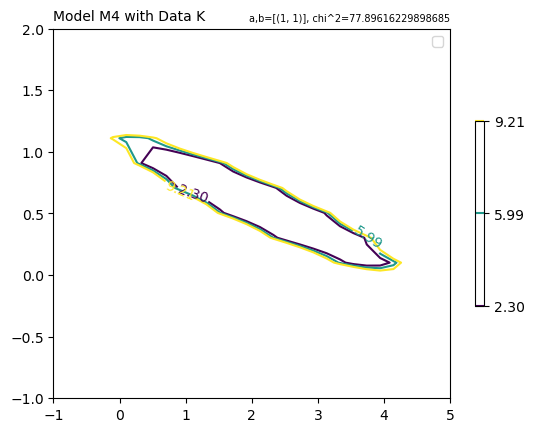

In [992]:
# model 3
models = {}
ab_list = []
for a in a_list:
    for b in b_list:
        model = model4(a, b, data_h_x)
        [x for x in model if math.isnan(x) == False]
        #ab_list = [a, b]
        models[a, b] = model


chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b] = chis

# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)

chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model4(X, Y, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS =  ax.contour(X,Y,chis_contour,levels=prob_df_2)
ax.set_ylim([-1,2])
ax.set_xlim([-1, 5])
ax.set_title(f'Model M4 with Data K', loc="left", fontsize=10)
ax.set_title(f'a,b={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()

C:\Users\mming\AppData\Local\Temp\ipykernel_18000\2571719477.py:41: RuntimeWarning: invalid value encountered in sqrt
  model5_val = np.sqrt(a*(1+x)**3+b)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


최소값: nan
최소값의 키: []
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

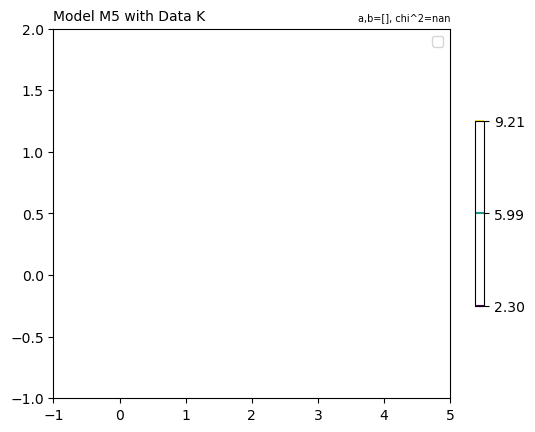

In [993]:
# model 3
models = {}
ab_list = []
for a in a_list:
    for b in b_list:
        model = model5(a, b, data_h_x)
        [x for x in model if math.isnan(x) == False]
        #ab_list = [a, b]
        models[a, b] = model


chis_dict = {}
for a in a_list:
    for b in b_list:
        model = models[a,b]
        chis = chi_squared(data_h_y, model, x_sigma)
        chis_dict[a,b] = chis

# 딕셔너리에서 최소값 찾기
min_value = min(chis_dict.values())

# 최소값에 해당하는 키 찾기
min_keys = [key for key, value in chis_dict.items() if value == min_value]

print("최소값:", min_value)
print("최소값의 키:", min_keys)

chis_contour = []
for temp in chis_dict.values():
    comp = temp-min_value
    chis_contour.append(comp)
    
print(chis_contour)

n = 100
prob_df_2=[2.3, 5.99, 9.21]
samp1 = np.linspace(-10,10,n)
samp2 = np.linspace(-10,10,n)
X, Y = np.meshgrid(samp1, samp2)
chis_contour = chi_squared(data_h_y, model5(X, Y, data_h_x), x_sigma) - min_value
#print(chis_contour)
fig, ax = plt.subplots()

CS =  ax.contour(X,Y,chis_contour,levels=prob_df_2)
ax.set_ylim([-1,2])
ax.set_xlim([-1, 5])
ax.set_title(f'Model M5 with Data K', loc="left", fontsize=10)
ax.set_title(f'a,b={min_keys}, chi^2={min_value}', loc="right", fontsize=7)
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()